In [95]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

In [96]:
# Read the inflation.csv file into a dataframe
growth_df = pd.read_csv("Working Data.csv")
growth_df = growth_df.sort_values(['country', 'year'])

In [97]:
for i in range(1, len(growth_df)):
    if growth_df.loc[i, 'country'] == growth_df.loc[i-1, 'country']:
        growth_df.loc[i, 'GDP_change'] = growth_df.loc[i, 'GDP'] - growth_df.loc[i-1, 'GDP']
growth_df = growth_df.drop('Unnamed: 0', axis=1)
growth_df = growth_df.reset_index(drop=True)
growth_df

,country,ISO,year,population,GDP,inflation,unemployment,GDP_change
0,Afghanistan,AFG,2018,36686784,1.841885e+10,0.626149,NaN,-4.856420e+08
1,Afghanistan,AFG,2019,37769499,1.890449e+10,2.302373,NaN,-1.238952e+09
2,Afghanistan,AFG,2020,38972230,2.014344e+10,NaN,11.71,5.356581e+09
3,Afghanistan,AFG,2021,40099462,1.478686e+10,NaN,5.58,NaN
4,Albania,ALB,2018,2866376,1.515643e+10,2.028060,12.30,-2.453984e+08
...,...,...,...,...,...,...,...,...
847,Zambia,ZMB,2021,19473125,2.214763e+10,22.021234,5.20,NaN
848,Zimbabwe,ZWE,2018,15052184,3.415607e+10,10.618866,NaN,1.232383e+10
849,Zimbabwe,ZWE,2019,15354608,2.183223e+10,255.304991,7.37,3.225365e+08
850,Zimbabwe,ZWE,2020,15669666,2.150970e+10,557.201817,NaN,-6.861540e+09


In [98]:
covid_df = pd.read_csv("covid_scores_final.csv")
covid_df = covid_df.drop('Unnamed: 0', axis=1)
covid_df = covid_df.drop('Population', axis=1)
covid_df = covid_df.drop('CountryCode', axis=1)
covid_df

,Country,Year,ConfirmedCases,ConfirmedDeaths,CasesPer1k,DeathsPer1k,PopulationVaccinated,StringencyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex
0,Afghanistan,2020,52330.0,2189.0,1.320850,0.055252,0.00,50.400873,41.275527,46.769891,2.818182
1,Afghanistan,2021,158084.0,7356.0,3.895567,0.181269,9.13,29.242219,24.306740,27.781370,0.000000
2,Afghanistan,2022,207559.0,7849.0,4.980175,0.188329,26.15,11.415644,14.827370,16.943863,0.000000
3,Albania,2020,58316.0,1181.0,20.379044,0.412711,0.00,66.484618,63.669964,64.499673,57.863636
4,Albania,2021,210224.0,3217.0,73.818417,1.129623,36.28,48.590904,55.050986,55.216329,53.904110
...,...,...,...,...,...,...,...,...,...,...,...
556,Zambia,2021,254274.0,3734.0,12.877412,0.189104,6.08,41.460795,40.143178,43.368630,17.568493
557,Zambia,2022,334425.0,4024.0,16.482572,0.198328,42.74,9.308384,23.528247,24.311726,18.047945
558,Zimbabwe,2020,13867.0,363.0,0.875768,0.022925,0.00,77.067600,57.045564,61.712800,24.363636
559,Zimbabwe,2021,213258.0,5004.0,13.202425,0.309789,19.21,61.884932,53.640795,60.540219,5.342466


In [99]:
covid_df = covid_df.rename(columns={'Country': 'country'})
covid_df = covid_df.rename(columns={'Year': 'year'})
covid_df.loc[covid_df['country'] == 'Andorra']

,country,year,ConfirmedCases,ConfirmedDeaths,CasesPer1k,DeathsPer1k,PopulationVaccinated,StringencyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex
9,Andorra,2020,8049.0,84.0,102.692013,1.071702,0.00,48.257455,57.502618,52.290800,94.000000
10,Andorra,2021,23740.0,140.0,297.911856,1.756852,64.37,50.087534,62.595151,60.834932,74.931507
11,Andorra,2022,47751.0,165.0,597.186093,2.063532,66.99,11.986110,32.150411,33.747973,20.958904


In [100]:
merged_df = pd.merge(growth_df, covid_df, on=['country', 'year'], how='outer')
merged_df

,country,ISO,year,population,GDP,inflation,unemployment,GDP_change,ConfirmedCases,ConfirmedDeaths,CasesPer1k,DeathsPer1k,PopulationVaccinated,StringencyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex
0,Afghanistan,AFG,2018,36686784.0,1.841885e+10,0.626149,NaN,-4.856420e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2019,37769499.0,1.890449e+10,2.302373,NaN,-1.238952e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,2020,38972230.0,2.014344e+10,NaN,11.71,5.356581e+09,52330.0,2189.0,1.320850,0.055252,0.00,50.400873,41.275527,46.769891,2.818182
3,Afghanistan,AFG,2021,40099462.0,1.478686e+10,NaN,5.58,NaN,158084.0,7356.0,3.895567,0.181269,9.13,29.242219,24.306740,27.781370,0.000000
4,Albania,ALB,2018,2866376.0,1.515643e+10,2.028060,12.30,-2.453984e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Vietnam,NaN,2021,NaN,NaN,NaN,NaN,NaN,1731257.0,32394.0,17.694364,0.331084,69.70,69.148493,64.241973,70.131233,23.013699
1081,Vietnam,NaN,2022,NaN,NaN,NaN,NaN,NaN,11525231.0,43186.0,116.970099,0.438297,87.29,37.224575,44.821918,51.223370,0.000000
1082,Yemen,NaN,2022,NaN,NaN,NaN,NaN,NaN,11945.0,2159.0,0.350592,0.063368,2.25,16.224822,16.310411,18.639918,0.000000
1083,Zambia,NaN,2022,NaN,NaN,NaN,NaN,NaN,334425.0,4024.0,16.482572,0.198328,42.74,9.308384,23.528247,24.311726,18.047945


In [101]:
merged_df = merged_df.dropna(subset=['ISO'])
merged_df.to_csv("merged.csv")

In [109]:
# iterate through each row of the DataFrame
for index, row in merged_df.iterrows():
    # extract the population and GDP values for the current row
    population = row['population']
    GDP = row['GDP']
    
    # calculate the GDP per capita for the current row
    GDPperCapita = GDP / population
    
    # assign the calculated GDP per capita value to the 'GDP per Capita' column for the current row
    merged_df.loc[index, 'GDP per Capita'] = GDPperCapita

In [114]:
merged_df

,country,ISO,year,population,GDP,inflation,unemployment,GDP_change,ConfirmedCases,ConfirmedDeaths,CasesPer1k,DeathsPer1k,PopulationVaccinated,StringencyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex,GDP per Capita
0,Afghanistan,AFG,2018,36686784.0,1.841885e+10,0.626149,NaN,-4.856420e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,502.056771
1,Afghanistan,AFG,2019,37769499.0,1.890449e+10,2.302373,NaN,-1.238952e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.522664
2,Afghanistan,AFG,2020,38972230.0,2.014344e+10,NaN,11.71,5.356581e+09,52330.0,2189.0,1.320850,0.055252,0.00,50.400873,41.275527,46.769891,2.818182,516.866552
3,Afghanistan,AFG,2021,40099462.0,1.478686e+10,NaN,5.58,NaN,158084.0,7356.0,3.895567,0.181269,9.13,29.242219,24.306740,27.781370,0.000000,368.754614
4,Albania,ALB,2018,2866376.0,1.515643e+10,2.028060,12.30,-2.453984e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5287.663694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,Zambia,ZMB,2021,19473125.0,2.214763e+10,22.021234,5.20,NaN,254274.0,3734.0,12.877412,0.189104,6.08,41.460795,40.143178,43.368630,17.568493,1137.343633
848,Zimbabwe,ZWE,2018,15052184.0,3.415607e+10,10.618866,NaN,1.232383e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2269.177012
849,Zimbabwe,ZWE,2019,15354608.0,2.183223e+10,255.304991,7.37,3.225365e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1421.868596
850,Zimbabwe,ZWE,2020,15669666.0,2.150970e+10,557.201817,NaN,-6.861540e+09,13867.0,363.0,0.875768,0.022925,0.00,77.067600,57.045564,61.712800,24.363636,1372.696674


DEVELOPED COUNTRIES VS. DEVELOPING COUNTRIES

In [120]:
#Major Countries

#GDP per capita above $13,205
developed_df = merged_df.loc[merged_df['GDP per Capita'] >= 13205]
developed_df = developed_df.dropna()
developing_df = merged_df.loc[merged_df['GDP per Capita'] < 13205]
developing_df = developing_df.dropna()



<AxesSubplot:title={'center':'GDP Growth vs. Population by Country (2018-2021)'}, xlabel='GDP_change', ylabel='population'>

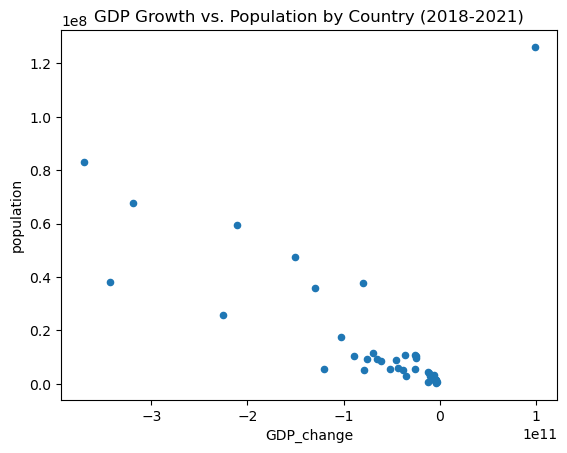

In [111]:
developed_df.plot(x='GDP_change', y='population', kind='scatter', title='GDP Growth vs. Population by Country (2018-2021)', legend=True)

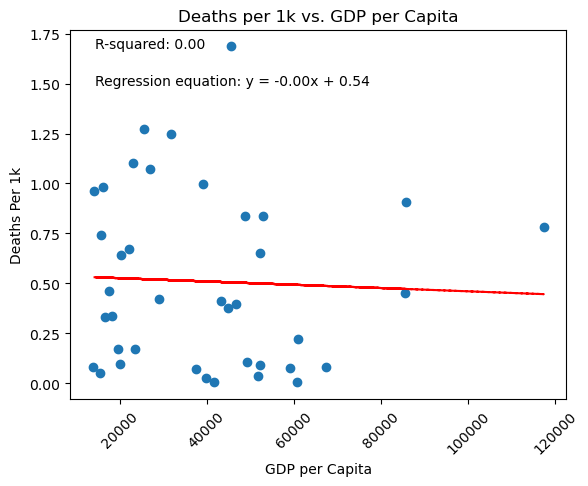

In [112]:
GDP_per = developed_df['GDP per Capita']
DeathsPer1k = developed_df['DeathsPer1k']

# Fit a polynomial regression line to the data
coefficients = np.polyfit(GDP_per, DeathsPer1k, 1)
m = coefficients[0]  # slope
b = coefficients[1]  # intercept
fit = m * GDP_per + b  # regression line equation

# Calculate the R-squared value
r_value, p_value = linregress(GDP_per, DeathsPer1k)[:2]
r_squared = r_value ** 2

# Plot the scatter plot with regression line and equation
plt.scatter(GDP_per, DeathsPer1k)
plt.plot(GDP_per, fit, '--', color='red')

# Set the x-tick labels to display at a 45-degree angle
plt.xticks(rotation=45)

# Add the R-squared value and regression equation to the plot
plt.text(0.05, 0.95, f"R-squared: {r_squared:.2f}", transform=plt.gca().transAxes)
plt.text(0.05, 0.85, f"Regression equation: y = {m:.2f}x + {b:.2f}", transform=plt.gca().transAxes)

plt.xlabel('GDP per Capita')
plt.ylabel('Deaths Per 1k')
plt.title("Deaths per 1k vs. GDP per Capita")
plt.show()

0.040038893204830665


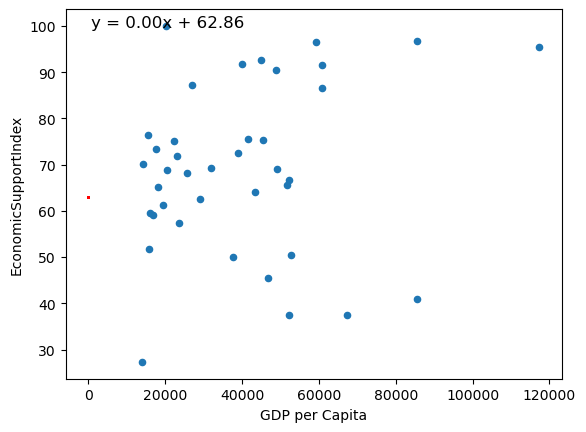

In [119]:
# Linear regression on Developed Countries

slope, intercept, r_value, p_value, std_err = stats.linregress(developed_df['GDP per Capita'], developed_df['EconomicSupportIndex'])
line = slope * developed_df['EconomicSupportIndex'] + intercept

# Label plot and annotate the line equation
developed_df.plot.scatter(x='GDP per Capita', y='EconomicSupportIndex')
plt.plot(developed_df['EconomicSupportIndex'], line, color='red')

# Print r square value
print(r_value**2)
eqn = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(eqn, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)


# Show plot
plt.show()

0.0459132919768254


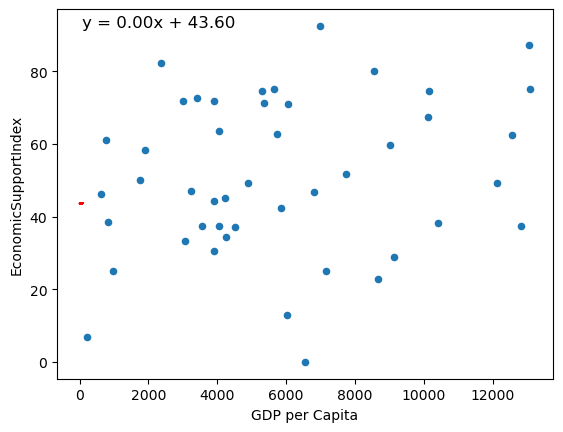

In [122]:
# Linear regression on Developed Countries

slope, intercept, r_value, p_value, std_err = stats.linregress(developing_df['GDP per Capita'], developing_df['EconomicSupportIndex'])
line = slope * developing_df['EconomicSupportIndex'] + intercept

# Label plot and annotate the line equation
developing_df.plot.scatter(x='GDP per Capita', y='EconomicSupportIndex')
plt.plot(developing_df['EconomicSupportIndex'], line, color='red')

# Print r square value
print(r_value**2)
eqn = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(eqn, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)


# Show plot
plt.show()

0.15498392084395032


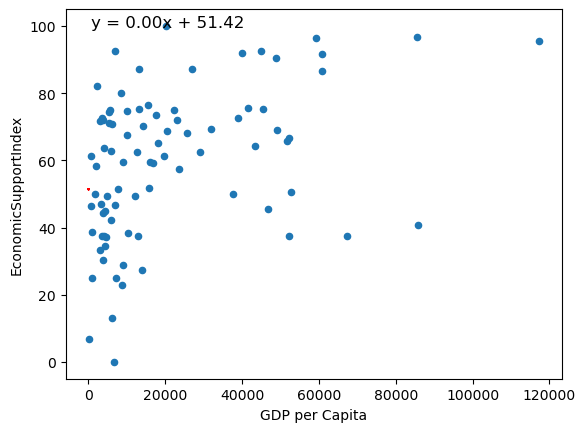

In [124]:
# Linear regression on Developed Countries
merged_df = merged_df.dropna()
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df['GDP per Capita'], merged_df['EconomicSupportIndex'])
line = slope * merged_df['EconomicSupportIndex'] + intercept

# Label plot and annotate the line equation
merged_df.plot.scatter(x='GDP per Capita', y='EconomicSupportIndex')
plt.plot(merged_df['EconomicSupportIndex'], line, color='red')

# Print r square value
print(r_value**2)
eqn = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(eqn, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)


# Show plot
plt.show()